This is a code notebook.

Each you can execute or run each cell by pressing shift+Enter at the same time


In [21]:
#first we will import packages hit shift+Enter to run this cell
!pip install matplotlib-surface-plotting
!git clone https://www.github.com/kwagstyl/matplotlib_surface_plotting

#

%cd matplotlib_surface_plotting
import matplotlib_surface_plotting as msp
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nb
import seaborn as sns
%matplotlib inline

fatal: destination path 'matplotlib_surface_plotting' already exists and is not an empty directory.
/content/matplotlib_surface_plotting/matplotlib_surface_plotting


In [22]:
#you can store variables in names
a=5+5
print(a)
b=a+5
print(b)

10
15


In [2]:
#we will import data into new variables (shift+Enter to execute)
#import a brain surface
surf=nb.load('data/fs_LR.32k.L.inflated.surf.gii')
verts,faces=surf.darrays[0].data,surf.darrays[1].data
#import some demo flair data
flair_control = nb.load('data/S1200.MyelinMap.L.func.gii').darrays[0].data
parcels = nb.load('data/Glasser_2016.32k.L.label.gii').darrays[0].data


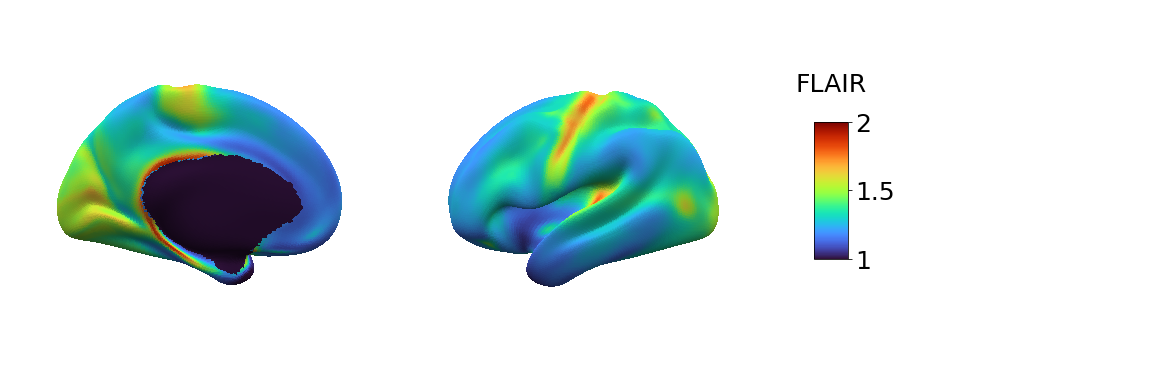

In [3]:
#let's have a look at FLAIR on the control
msp.plot_surf(verts,faces,flair_control,cmap_label='FLAIR',cmap='turbo',vmin=1,vmax=2)

In [23]:
#Make some small example lesions
#create empty variables with zeros
patients = np.zeros((6,len(flair_control)))
#choose the regions of interest (rois)
rois = [1,6,24,8,9,84]
#change the values in the regions of interest
for p in np.arange(6):
  patients[p,:]=flair_control.copy()
  patients[p,parcels==rois[p]]+=0.3

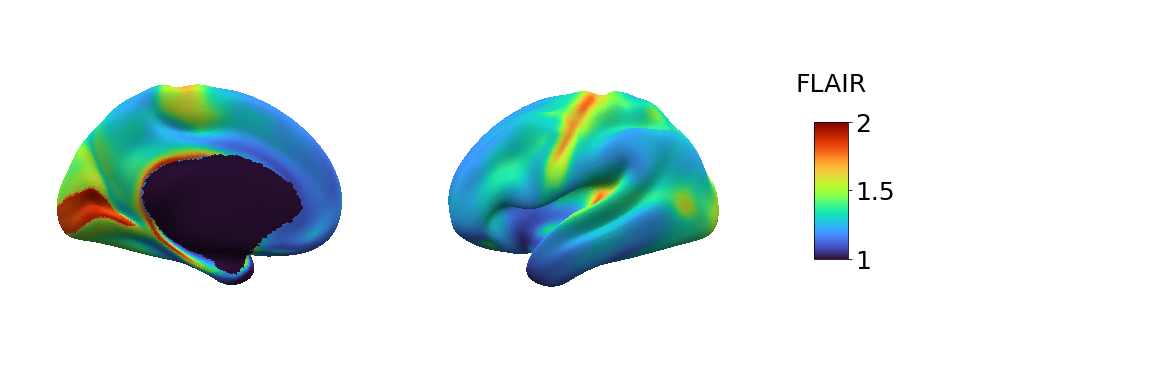

In [6]:
#plot one subject
msp.plot_surf(verts,faces,
              #try changing which patient is being plotted by changing
              #the number in side the [].
              patients[0],
              cmap_label='FLAIR',cmap='turbo',vmin=1,vmax=2)

In [7]:
#what type of seizure would each patient have had?
#patient 0:
#patient 1:
#patient 2:
#patient 3:
#patient 4:
#patient 5:




Text(0.5, 0, 'FLAIR value')

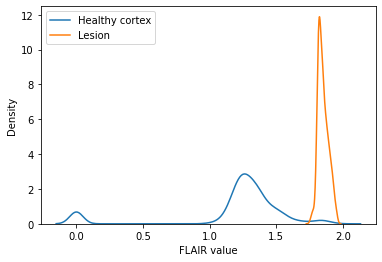

In [17]:

sns.kdeplot(patients[0],label='Healthy cortex')
sns.kdeplot(patients[0,parcels==rois[0]],label='Lesion')
plt.legend()
plt.xlabel('FLAIR value')

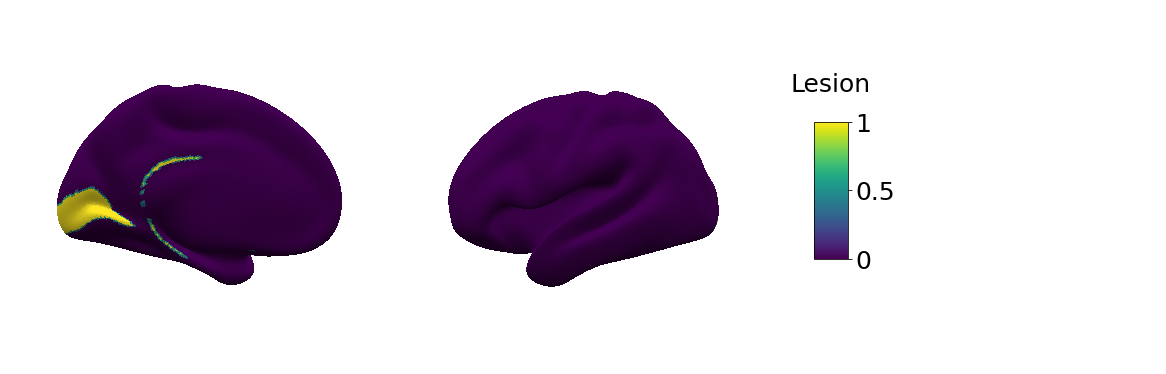

In [20]:
#change the threshold to isolate the lesion. Try threshold of 0.5 and 2.0 first, 
#then figure out what number works best
threshold=1.8
msp.plot_surf(verts,faces,
              
              #try changing which patient is being plotted
              patients[0]>threshold,
              cmap_label='Lesion',cmap='viridis',vmin=0,vmax=1)